# House Price Prediction

In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv("House-Price-Prediction-Dataset.csv")
df.head

<bound method NDFrame.head of         Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [4]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

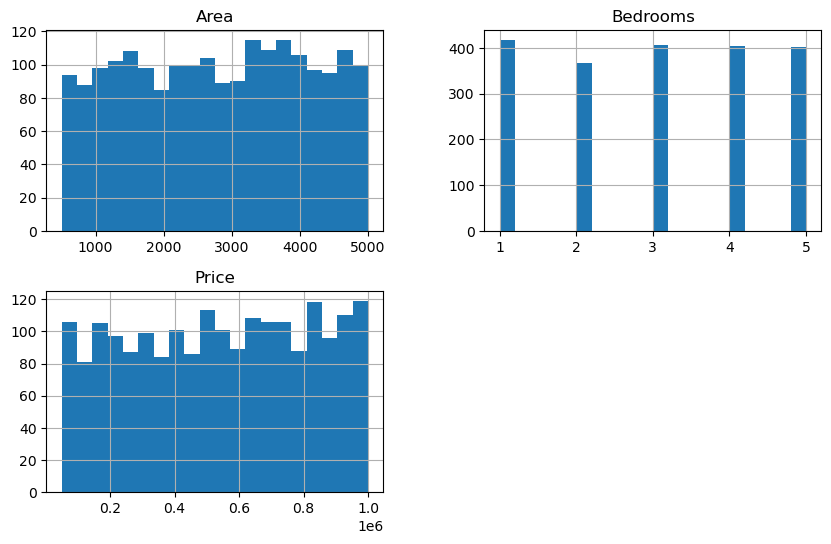

In [8]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

df[['Area', 'Bedrooms', 'Price']].hist(bins=20, figsize=(10, 6))
plt.title("Feature Distributions", y=1.02)
plt.show()

In [9]:
## Preprocess data
from sklearn.preprocessing import StandardScaler

X = df[['Area', 'Bedrooms']]
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled features:\n", X_scaled)

Scaled features:
 [[-1.10147065  1.40179052]
 [ 1.14748543  1.40179052]
 [ 0.62231712 -0.70458141]
 ...
 [-1.33161794  1.40179052]
 [ 0.9853011  -0.00245743]
 [ 0.15661639  1.40179052]]


In [12]:
## Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Size:", len(X_train), "Test Size:", len(X_test))

Train Size: 1600 Test Size: 400


In [13]:
# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluate 
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: ${mae:}")

MAE: $242478.5282869851


In [19]:
# Improve
from sklearn.ensemble import RandomForestRegressor  
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: ${rf_mae}")

Random Forest MAE: $270320.43995386903


In [20]:
## Deploy/ save model
import joblib
joblib.dump(rf_model, "House-Prediction.pkl")

['House-Prediction.pkl']

In [24]:
loaded_model = joblib.load("House-Prediction.pkl")
new_house = scaler.transform([[1600, 30]])
print("Predicted Price: $", round(loaded_model.predict(new_house)[0]))

Predicted Price: $ 504836


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


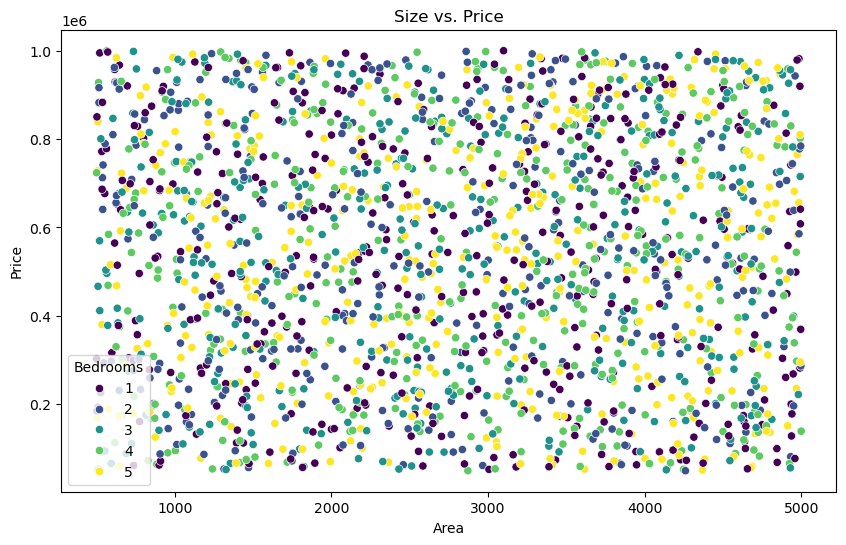

In [27]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df, hue='Bedrooms', palette='viridis')
plt.title('Size vs. Price')
plt.show()

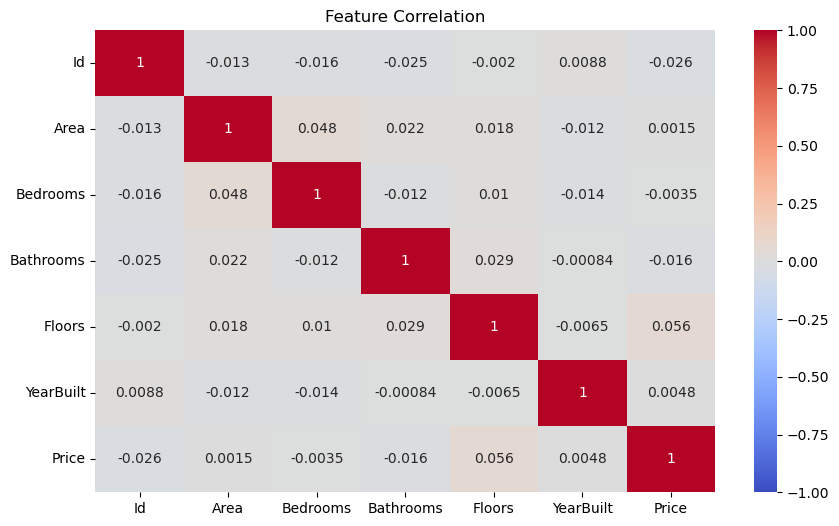

In [33]:
# correlation heatmap

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation")
plt.show()